In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

# Preprocessing

In [3]:
path = os.getcwd() + '\\data\\'
# Lưu địa chỉ các file cần đọc
filepaths = []
for file in os.listdir(path):
    if file.endswith(".csv"):
        filepath = path + file
        filepaths.append(filepath)

In [4]:
filepaths

['e:\\KHDL\\BT4\\report-sales-pandas\\data\\sales2019_1.csv',
 'e:\\KHDL\\BT4\\report-sales-pandas\\data\\sales2019_10.csv',
 'e:\\KHDL\\BT4\\report-sales-pandas\\data\\sales2019_11.csv',
 'e:\\KHDL\\BT4\\report-sales-pandas\\data\\sales2019_12.csv',
 'e:\\KHDL\\BT4\\report-sales-pandas\\data\\sales2019_2.csv',
 'e:\\KHDL\\BT4\\report-sales-pandas\\data\\sales2019_3.csv',
 'e:\\KHDL\\BT4\\report-sales-pandas\\data\\sales2019_4.csv',
 'e:\\KHDL\\BT4\\report-sales-pandas\\data\\sales2019_5.csv',
 'e:\\KHDL\\BT4\\report-sales-pandas\\data\\sales2019_6.csv',
 'e:\\KHDL\\BT4\\report-sales-pandas\\data\\sales2019_7.csv',
 'e:\\KHDL\\BT4\\report-sales-pandas\\data\\sales2019_8.csv',
 'e:\\KHDL\\BT4\\report-sales-pandas\\data\\sales2019_9.csv']

In [5]:
# Gộp tất cả các dataframe lại với nhau bằng pd.concat(list các dataframes)
frames = []
for file in filepaths:
    df = pd.read_csv(file)  # Đọc file csv (comma seperated values)
    frames.append(df)
res = pd.concat(frames)
df = res
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [6]:
df = df.to_csv('annualSales.csv', index=False)  #Lưu df lớn vào file annualSales, loại bỏ index
df = pd.read_csv('annualSales.csv')

In [7]:
df['Month'] = df['Order Date'].str[0:2] #Thêm cột month = cách substring cột order date (2 kí tự đầu)
df=df.dropna()  # Xóa dòng NaN

In [8]:
df=df[df['Month']!='Or']  #Lấy các dòng có month != 'Or'
df
df['Month']=df['Month'].astype(int)  #Chuyển data type từ string sang int

In [9]:
print(set(df['Month']))

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}


In [10]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9


In [11]:
df['Quantity Ordered']=df['Quantity Ordered'].astype(int) #Thay đổi data type sang int

In [12]:
df['Price Each']=df['Price Each'].astype(float) #Thay đổi data type sang float

In [13]:
df.dtypes

Order ID             object
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
dtype: object

In [14]:
df['Sales']=df['Price Each']*df['Quantity Ordered']  #Thêm cột Tottal=Price Each * Quantity Order

In [15]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99


# Three-Dimensional Plotting

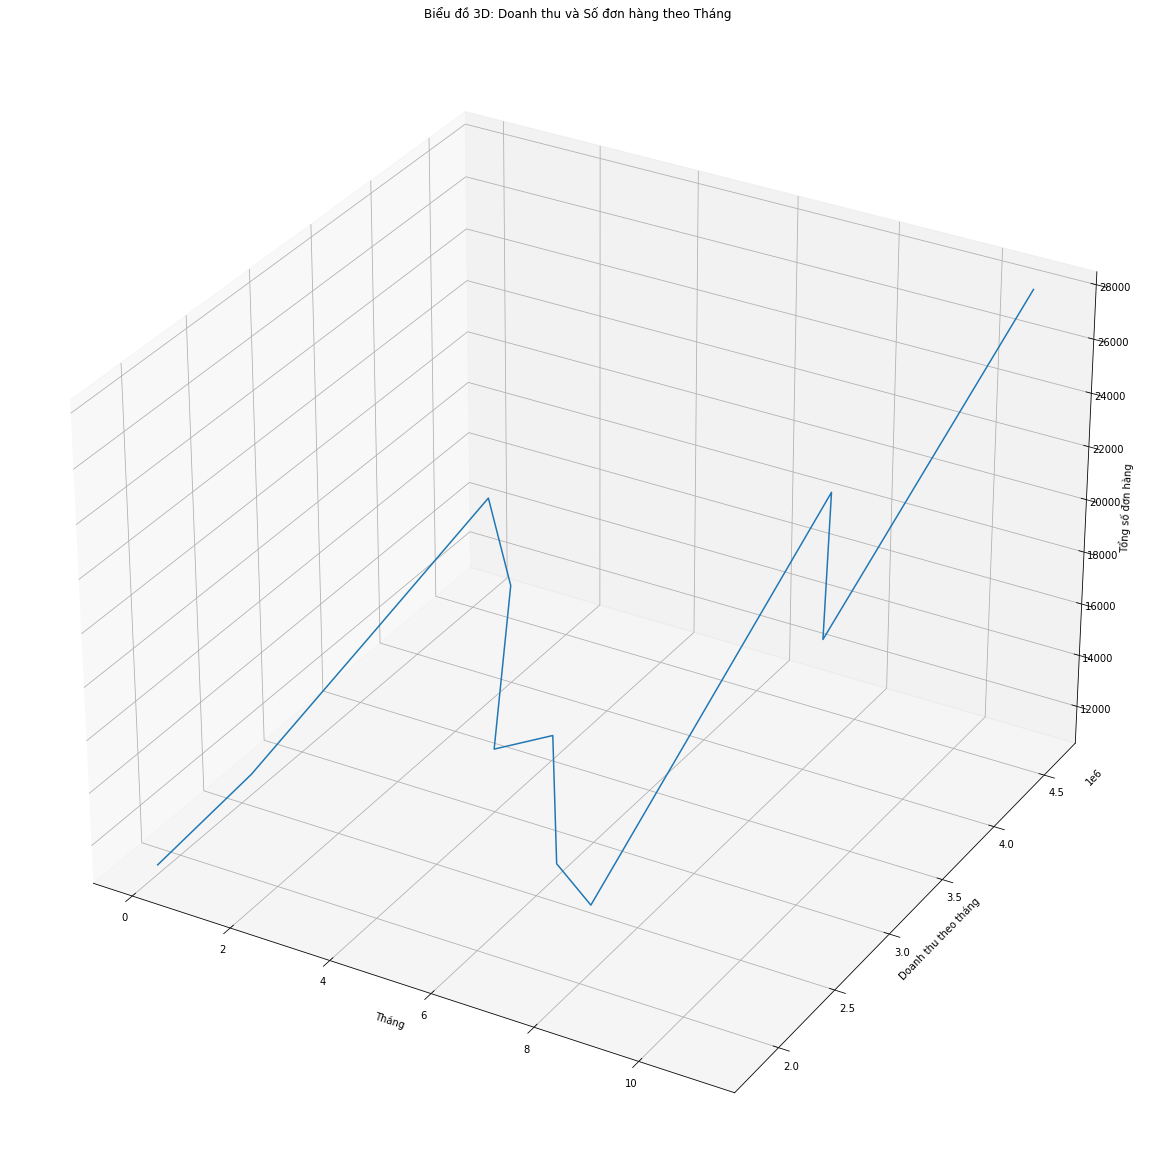

In [126]:
df1 = df.groupby('Month')['Sales'].sum().reset_index(name='Sales_by_month')
df1['Order_by_month'] = df.groupby('Month')['Quantity Ordered'].sum().values
months = np.arange(len(df1))  # Thay thế bằng các giá trị tháng thực tế nếu có
sales = df1['Sales_by_month'].values
total_orders = df1['Order_by_month'].values

# Tạo biểu đồ 3D
fig = plt.figure(figsize=(30,21))
ax = fig.add_subplot(111, projection='3d')

# Vẽ đường thẳng
ax.plot(months, sales, total_orders)

# Thêm nhãn
ax.set_xlabel('Tháng')
ax.set_ylabel('Doanh thu theo tháng')
ax.set_zlabel('Tổng số đơn hàng')
ax.set_title('Biểu đồ 3D: Doanh thu và Số đơn hàng theo Tháng')

# Hiển thị biểu đồ
plt.show()

# Binnings Plots

In [88]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
# Lấy ngày
df['Date'] = df['Order Date'].dt.date
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hours,Total Sales,Date
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,Boston,21,700.00,2019-01-22
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,Portland,14,14.95,2019-01-28
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco,13,23.98,2019-01-17
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles,20,149.99,2019-01-05
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,Austin,11,11.99,2019-01-25
...,...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles,20,8.97,2019-09-17
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco,16,700.00,2019-09-01
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco,7,700.00,2019-09-23
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco,17,379.99,2019-09-19


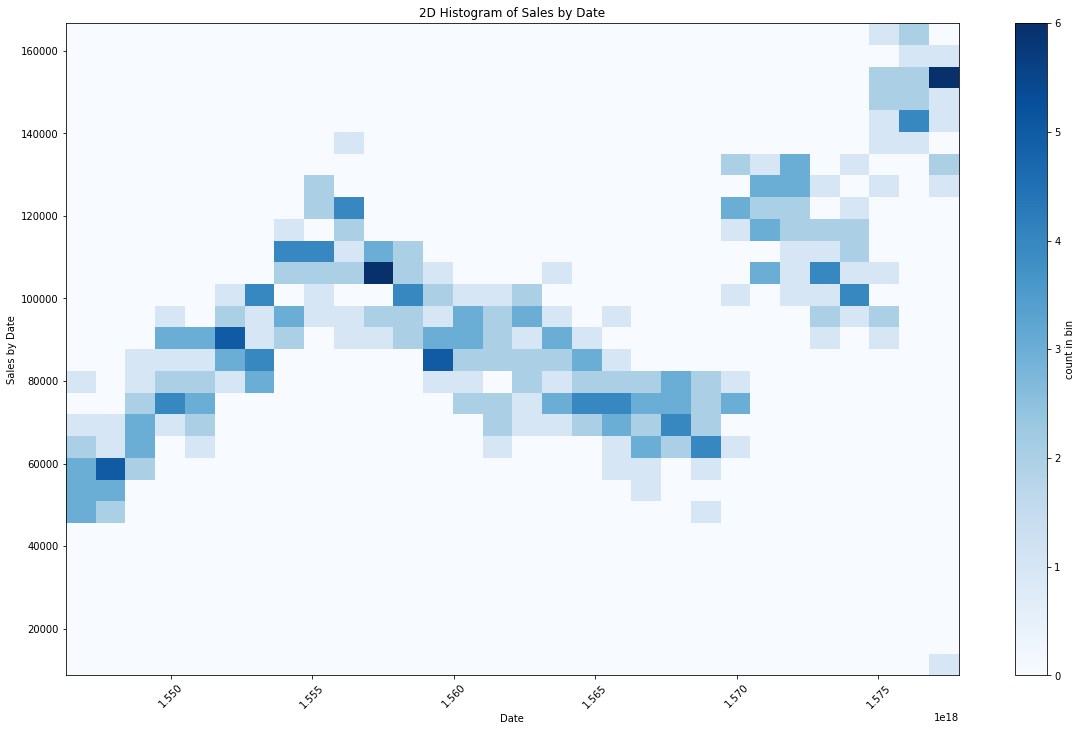

In [117]:
df['Date'] = pd.to_datetime(df['Date'])

# Tính tổng doanh thu theo ngày
df1 = df.groupby('Date')['Sales'].sum().reset_index(name='Sales_by_date')

# Tạo biến x và y
x = df1['Date']  # Ngày
y = df1['Sales_by_date']  # Doanh thu theo ngày

# Tạo biểu đồ 2D histogram
plt.figure(figsize=(20, 12))
plt.hist2d(x, y, bins= 30,F cmap='Blues')  # 365 bins cho ngày và 50 cho doanh thu
plt.colorbar(label='count in bin')  # Hiển thị thanh màu

# Gán nhãn và tiêu đề
plt.xlabel('Date')
plt.ylabel('Sales by Date')
plt.title('2D Histogram of Sales by Date')
plt.xticks(rotation=45)  # Xoay nhãn trục x để dễ đọc
plt.grid(False)  # Tắt lưới nếu không cần
plt.show()

In [95]:
df1

,Date,Sales_by_date
0,2019-01-01,65681.94
1,2019-01-02,70813.20
2,2019-01-03,47046.20
3,2019-01-04,62012.21
4,2019-01-05,46524.63
...,...,...
361,2019-12-28,134015.50
362,2019-12-29,156024.62
363,2019-12-30,152319.81
364,2019-12-31,131454.30


In [17]:
df1.head(50)

,Month,Sales by months
0,1,1822256.73
1,2,2202022.42
2,3,2807100.38
3,4,3390670.24
4,5,3152606.75
5,6,2577802.26
6,7,2647775.76
7,8,2244467.88
8,9,2097560.13
9,10,3736726.88


In [18]:
df1[df1['Sales by months']==df1['Sales by months'].max()] #Lấy ra tháng có doanh số cao nhất

,Month,Sales by months
11,12,4613443.34


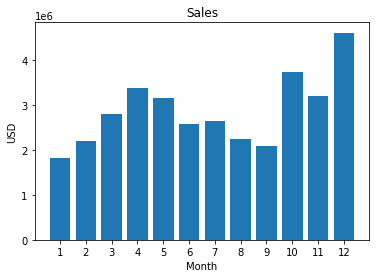

In [19]:
months=[ i for i in range (1,13)]
plt.bar(months,df1['Sales by months'])
plt.xticks(months) #Nếu không có dòng này thì trục hoành chỉ có tháng chẵn
plt.ylabel('USD') #Đặt tên trục tung
plt.xlabel('Month') #Đặt tên trục hoành
plt.title('Sales') #Đặt tên biểu đồ
plt.show()

# Thành phố nào có doanh số cao nhất?

In [20]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99


In [21]:
#Tạo cột city, slice chuỗi, lấy vị trí thứ 2 trong list (tên thành phố)
df['City']=df['Purchase Address'].str.split(',').str[1]

In [22]:
#Tính tổng tiền thu được theo thành phố, tạo data frame df2 gồm 2 cột, cột 1 là city, cột 2 là sales by cities
df2=df.groupby('City')['Sales'].sum().reset_index(name='Sales by cities')
df2

,City,Sales by cities
0,Atlanta,2795498.58
1,Austin,1819581.75
2,Boston,3661642.01
3,Dallas,2767975.40
4,Los Angeles,5452570.80
5,New York City,4664317.43
6,Portland,2320490.61
7,San Francisco,8262203.91
8,Seattle,2747755.48


In [23]:
df2.dtypes

City                object
Sales by cities    float64
dtype: object

In [24]:
df2[df2['Sales by cities']==df2['Sales by cities'].max()] #Lấy ra thành phố có doanh số cao nhất

,City,Sales by cities
7,San Francisco,8262203.91


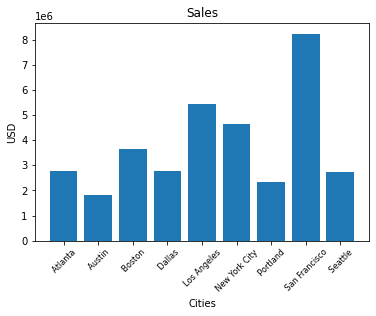

In [25]:
months=[ i for i in range (1,13)]
plt.bar(df2['City'],df2['Sales by cities'])
#plt.xticks(df2['City'])
plt.ylabel('USD')
plt.xlabel('Cities')
plt.title('Sales')
plt.xticks(rotation=45,size=8) #Rotate, resize tên thành phố ở trục hoành
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, ' Atlanta'),
  Text(1, 0, ' Austin'),
  Text(2, 0, ' Boston'),
  Text(3, 0, ' Dallas'),
  Text(4, 0, ' Los Angeles'),
  Text(5, 0, ' New York City'),
  Text(6, 0, ' Portland'),
  Text(7, 0, ' San Francisco'),
  Text(8, 0, ' Seattle')])

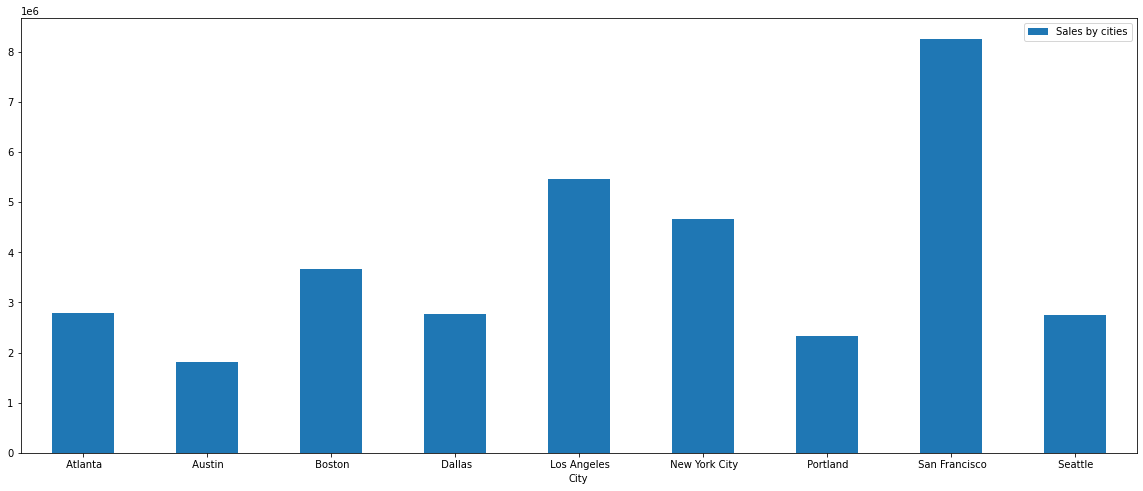

In [26]:
#  Rotate, resize tên thành phố ở trục hoành
df2.plot(kind='bar',x='City',figsize=(20,8))
plt.xticks(rotation=0,size=10)

# Doanh nghiệp cần chiếu quảng cáo vào khung thời gian nào để tăng khả năng mua hàng của khách hàng?

In [27]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00,Boston
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95,Portland
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99,Austin
...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco


In [28]:
df.dtypes

Order ID             object
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
Sales               float64
City                 object
dtype: object

In [29]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

C:\Users\84387\AppData\Local\Temp\ipykernel_13552\3072535395.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'])


In [30]:
df['Hours']=df['Order Date'].dt.hour

In [31]:
df3 = df.groupby('Hours')['Quantity Ordered'].sum().reset_index(name='Amount')
#Nếu không có .reset_index thì df3 và df4 lại là series
df3.dtypes

Hours     int32
Amount    int32
dtype: object

In [32]:
df4=df.groupby('Hours')['Sales'].sum().reset_index(name="Sales")
df4.dtypes

Hours      int32
Sales    float64
dtype: object

24
24
24


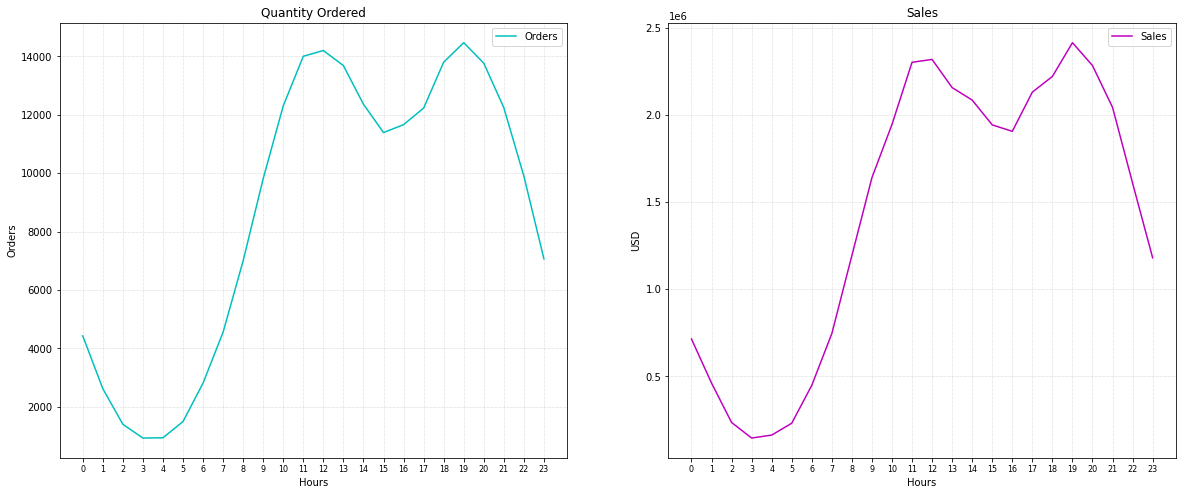

In [33]:

# Giả sử df3 và df4 đã được định nghĩa trước đó
Hours = [h for h in range(0, 24)]

# Kiểm tra kích thước
print(len(Hours))             # Kích thước của Hours
print(len(df3['Amount']))     # Kích thước của Amount
print(len(df4['Sales']))      # Kích thước của Sales

plt.subplots(1, 2, figsize=(20, 8))  # 1 hàng, 2 cột

# Đồ thị thứ nhất
plt.subplot(1, 2, 1)
amount_values = df3['Amount'].values.flatten()  # Chuyển đổi thành mảng 1 chiều
plt.plot(Hours, amount_values, c='c', label='Orders')
plt.grid(ls=':', lw=0.5)
plt.xticks(Hours, size=8)
plt.xlabel("Hours")
plt.ylabel("Orders")
plt.title('Quantity Ordered')
plt.legend()

# Đồ thị thứ hai
plt.subplot(1, 2, 2)
sales_values = df4['Sales'].values.flatten()  # Chuyển đổi thành mảng 1 chiều
plt.plot(Hours, sales_values, c='m', label='Sales')
plt.grid(ls=':', lw=0.5)
plt.xticks(Hours, size=8)
plt.xlabel("Hours")
plt.ylabel("USD")
plt.title('Sales')
plt.legend()

plt.show()  # Vẽ 2 line graph bên cạnh nhau

=> Từ 2 biểu đồ trên có thể thấy doanh nghiệp nên đầy mạnh quảng cáo vào các khung giờ: 11h-13h và 18-20h 

In [34]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hours
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,Boston,21
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,Portland,14
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco,13
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles,20
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,Austin,11
...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles,20
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco,16
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco,7
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco,17


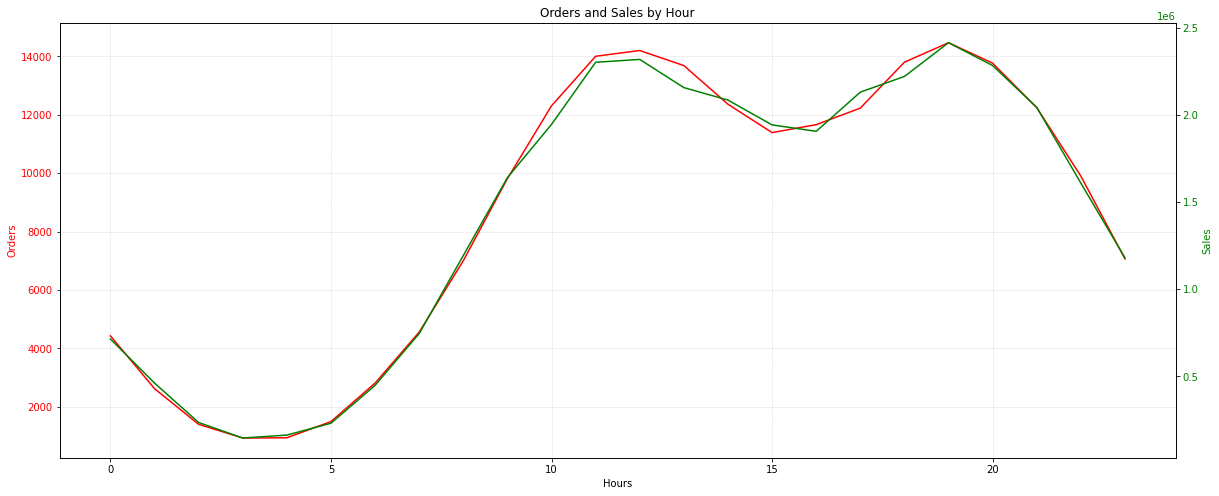

In [35]:

# Lọc số lần chốt đơn theo khung giờ
orders_in_hours = df.groupby('Hours')['Quantity Ordered'].sum()

# Lọc doanh thu theo khung giờ
sales_in_hours = df.groupby('Hours')['Sales'].sum()

# Tạo list các giờ Hours
Hours = [hour for hour in orders_in_hours.index]  # Lấy giờ từ chỉ mục của orders_in_hours
x = Hours
y1 = orders_in_hours.values  # Chuyển đổi series thành mảng
y2 = sales_in_hours.values    # Chuyển đổi series thành mảng

fig, ax1 = plt.subplots(figsize=(20, 8))

# Vẽ đường cho số lượng đơn hàng
ax1.plot(x, y1, color='r', label='Orders')
ax1.set_xlabel('Hours')
ax1.set_ylabel('Orders', color='r')
ax1.tick_params(axis='y', labelcolor='r')

# Tạo trục y thứ hai cho doanh thu
ax2 = ax1.twinx()
ax2.plot(x, y2, color='g', label='Sales')
ax2.set_ylabel('Sales', color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Cài đặt lưới
ax1.grid(ls=':', lw=0.5)

# Hiển thị
plt.title('Orders and Sales by Hour')
plt.xticks(rotation=45)  # Xoay nhãn giờ cho dễ đọc
plt.show()

# Những sản phẩm nào thường được bán cùng nhau?

In [36]:
df_dup=df[df['Order ID'].duplicated(keep=False)] #Ở đây keep có thể bằng first, last hoặc flase
#Nếu keep= first thì giữ lại ví trí đầu tiên lặp, keep= last thì giữ lại vị trí cuối cùng lặp, keep= false thì giữ lại hết
df_dup

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hours
41,141275,USB-C Charging Cable,1,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,11.95,Austin,16
42,141275,Wired Headphones,1,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,11.99,Austin,16
57,141290,Apple Airpods Headphones,1,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,150.00,Los Angeles,8
58,141290,AA Batteries (4-pack),3,3.84,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,11.52,Los Angeles,8
133,141365,Vareebadd Phone,1,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",1,400.00,New York City,11
...,...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta,20
186803,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta,0
186804,259314,AAA Batteries (4-pack),2,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta,0
186841,259350,Google Phone,1,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco,13


In [37]:
group_product = lambda product: ', '.join(product)
#lambda arguments : expression
#  x = lambda a : a + 10
#  print(x(5))
# output : 15
df_dup['All Product'] = df_dup.groupby('Order ID')['Product'].transform(group_product)
# Gộp các hàng có cùng order id bằng transform (gộp product)
# Tham số của transform phải là một function, transform trả về series
df_dup

C:\Users\84387\AppData\Local\Temp\ipykernel_13552\441406251.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dup['All Product'] = df_dup.groupby('Order ID')['Product'].transform(group_product)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hours,All Product
41,141275,USB-C Charging Cable,1,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,11.95,Austin,16,"USB-C Charging Cable, Wired Headphones"
42,141275,Wired Headphones,1,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,11.99,Austin,16,"USB-C Charging Cable, Wired Headphones"
57,141290,Apple Airpods Headphones,1,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,150.00,Los Angeles,8,"Apple Airpods Headphones, AA Batteries (4-pack)"
58,141290,AA Batteries (4-pack),3,3.84,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,11.52,Los Angeles,8,"Apple Airpods Headphones, AA Batteries (4-pack)"
133,141365,Vareebadd Phone,1,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",1,400.00,New York City,11,"Vareebadd Phone, Wired Headphones"
...,...,...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta,20,"34in Ultrawide Monitor, AA Batteries (4-pack)"
186803,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta,0,"Wired Headphones, AAA Batteries (4-pack)"
186804,259314,AAA Batteries (4-pack),2,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta,0,"Wired Headphones, AAA Batteries (4-pack)"
186841,259350,Google Phone,1,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco,13,"Google Phone, USB-C Charging Cable"


In [38]:
df_dup[['Order ID', 'All Product']].drop_duplicates()['All Product'].value_counts()
#Xóa các order ID trùng nhau (giữ lại 1 chứ không xóa hết) , đếm số lượng của 'all product' trùng nhau

All Product
iPhone, Lightning Charging Cable                        882
Google Phone, USB-C Charging Cable                      856
iPhone, Wired Headphones                                361
Vareebadd Phone, USB-C Charging Cable                   312
Google Phone, Wired Headphones                          303
                                                       ... 
Vareebadd Phone, Wired Headphones, iPhone                 1
Google Phone, Wired Headphones, USB-C Charging Cable      1
LG Washing Machine, Wired Headphones                      1
LG Washing Machine, Google Phone                          1
LG Washing Machine, AA Batteries (4-pack)                 1
Name: count, Length: 366, dtype: int64

=> iPhone, Lightning Charging Cable là các sản phẩm được bán cùng nhau nhiều nhất

# Sản phẩm nào được bán nhiều nhất?

C:\Users\84387\AppData\Local\Temp\ipykernel_13552\4235347543.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(product_ls, rotation=40, ha='right')


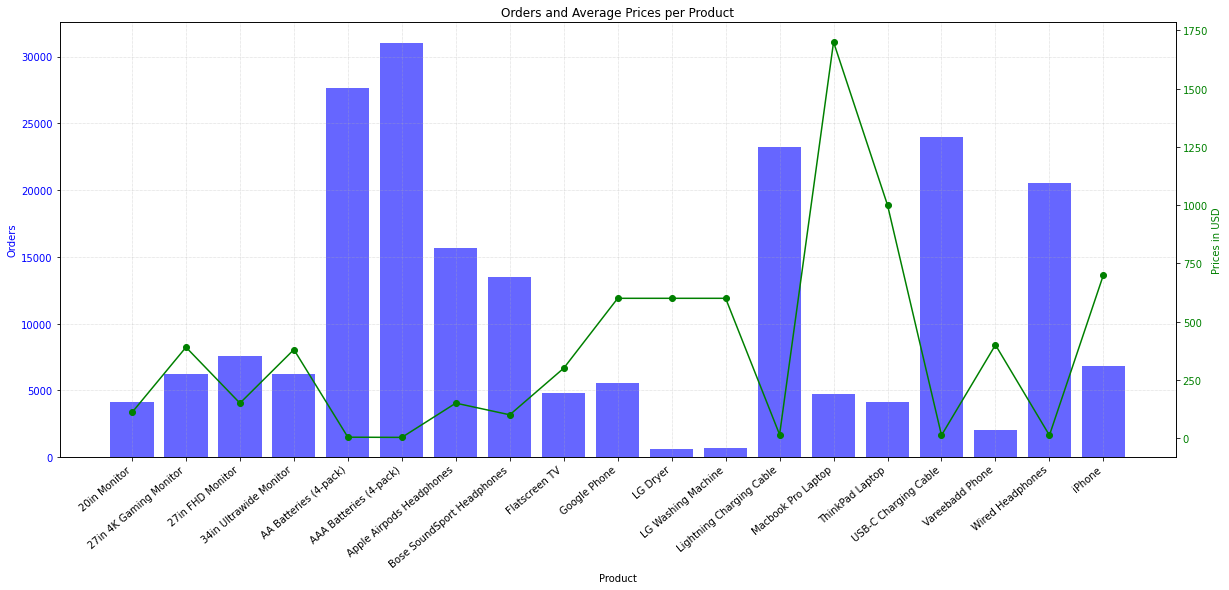

In [39]:

# Tính số lượng đơn hàng theo sản phẩm
orders_per_product = df.groupby('Product')['Quantity Ordered'].sum()

# Tính giá trung bình theo sản phẩm
prices_per_product = df.groupby('Product')['Price Each'].mean()

# Tạo danh sách sản phẩm
product_ls = orders_per_product.index.tolist()  # Lấy sản phẩm từ chỉ mục
x = product_ls
y1 = orders_per_product.values  # Chuyển đổi series thành mảng
y2 = prices_per_product.values    # Chuyển đổi series thành mảng

fig, ax1 = plt.subplots(figsize=(20, 8))

# Vẽ biểu đồ cột cho số lượng đơn hàng
ax1.bar(x, y1, color='b', alpha=0.6, label='Orders')
ax1.set_xlabel('Product')
ax1.set_ylabel('Orders', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Tạo trục y thứ hai cho giá
ax2 = ax1.twinx()
ax2.plot(x, y2, color='g', marker='o', label='Average Price')
ax2.set_ylabel('Prices in USD', color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Cài đặt nhãn cho trục x
ax1.set_xticklabels(product_ls, rotation=40, ha='right')

# Cài đặt lưới
ax1.grid(ls=':', lw=0.5)

# Hiển thị tiêu đề và biểu đồ
plt.title('Orders and Average Prices per Product')
plt.show()

- Lightning Charging Cable, MacbookPro là các sản phẩm được bán nhiều nhất, ngược lại 34in Ultrawide Monitor và AA batteries (4-pack) được bán ít nhất, điều này tỉ lệ nghịch với giá tiền của chúng.
- Bên cạnh đó LG Dryer và LG Washing Machine có giá rất thấp nhưng lại không bán chạy hơn nhiều so với các sản phẩm khác

# Scatter Plots

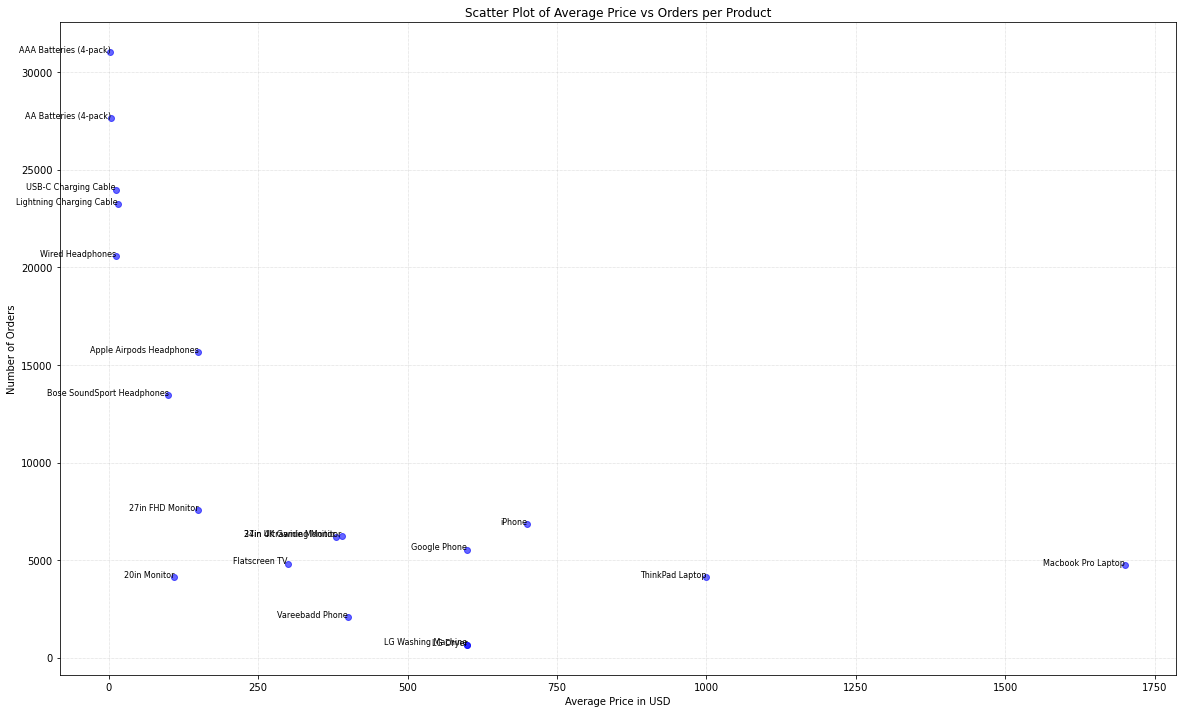

In [40]:

# Tính số lượng đơn hàng theo sản phẩm
orders_per_product = df.groupby('Product')['Quantity Ordered'].sum()

# Tính giá trung bình theo sản phẩm
prices_per_product = df.groupby('Product')['Price Each'].mean()

# Tạo danh sách sản phẩm
product_ls = orders_per_product.index.tolist()  # Lấy sản phẩm từ chỉ mục
x = prices_per_product.values  # Giá trung bình
y = orders_per_product.values    # Số lượng đơn hàng

# Vẽ scatter plot
plt.figure(figsize=(20, 12))
plt.scatter(x, y, color='b', alpha=0.6)

# Thêm nhãn và tiêu đề
plt.title('Scatter Plot of Average Price vs Orders per Product')
plt.xlabel('Average Price in USD')
plt.ylabel('Number of Orders')
plt.grid(ls=':', lw=0.5)

# Ghi chú cho các điểm
for i, product in enumerate(product_ls):
    plt.annotate(product, (x[i], y[i]), fontsize=8, ha='right')

plt.show()

In [59]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hours,Total Sales
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,Boston,21,700.00
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,Portland,14,14.95
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco,13,23.98
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles,20,149.99
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,Austin,11,11.99
...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles,20,8.97
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco,16,700.00
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco,7,700.00
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco,17,379.99


In [66]:
a = df.groupby('Product')['Quantity Ordered'].sum()
a

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int32

# Contour Plots

In [67]:
df1 = df.groupby('Product')['Sales'].sum().reset_index(name='Total_sale')
df1['Total_order'] = df.groupby('Product')['Quantity Ordered'].sum().values
df1

,Product,Total_sale,Total_order
0,20in Monitor,454148.71,4129
1,27in 4K Gaming Monitor,2435097.56,6244
2,27in FHD Monitor,1132424.50,7550
3,34in Ultrawide Monitor,2355558.01,6199
4,AA Batteries (4-pack),106118.40,27635
5,AAA Batteries (4-pack),92740.83,31017
6,Apple Airpods Headphones,2349150.00,15661
7,Bose SoundSport Headphones,1345565.43,13457
8,Flatscreen TV,1445700.00,4819
9,Google Phone,3319200.00,5532


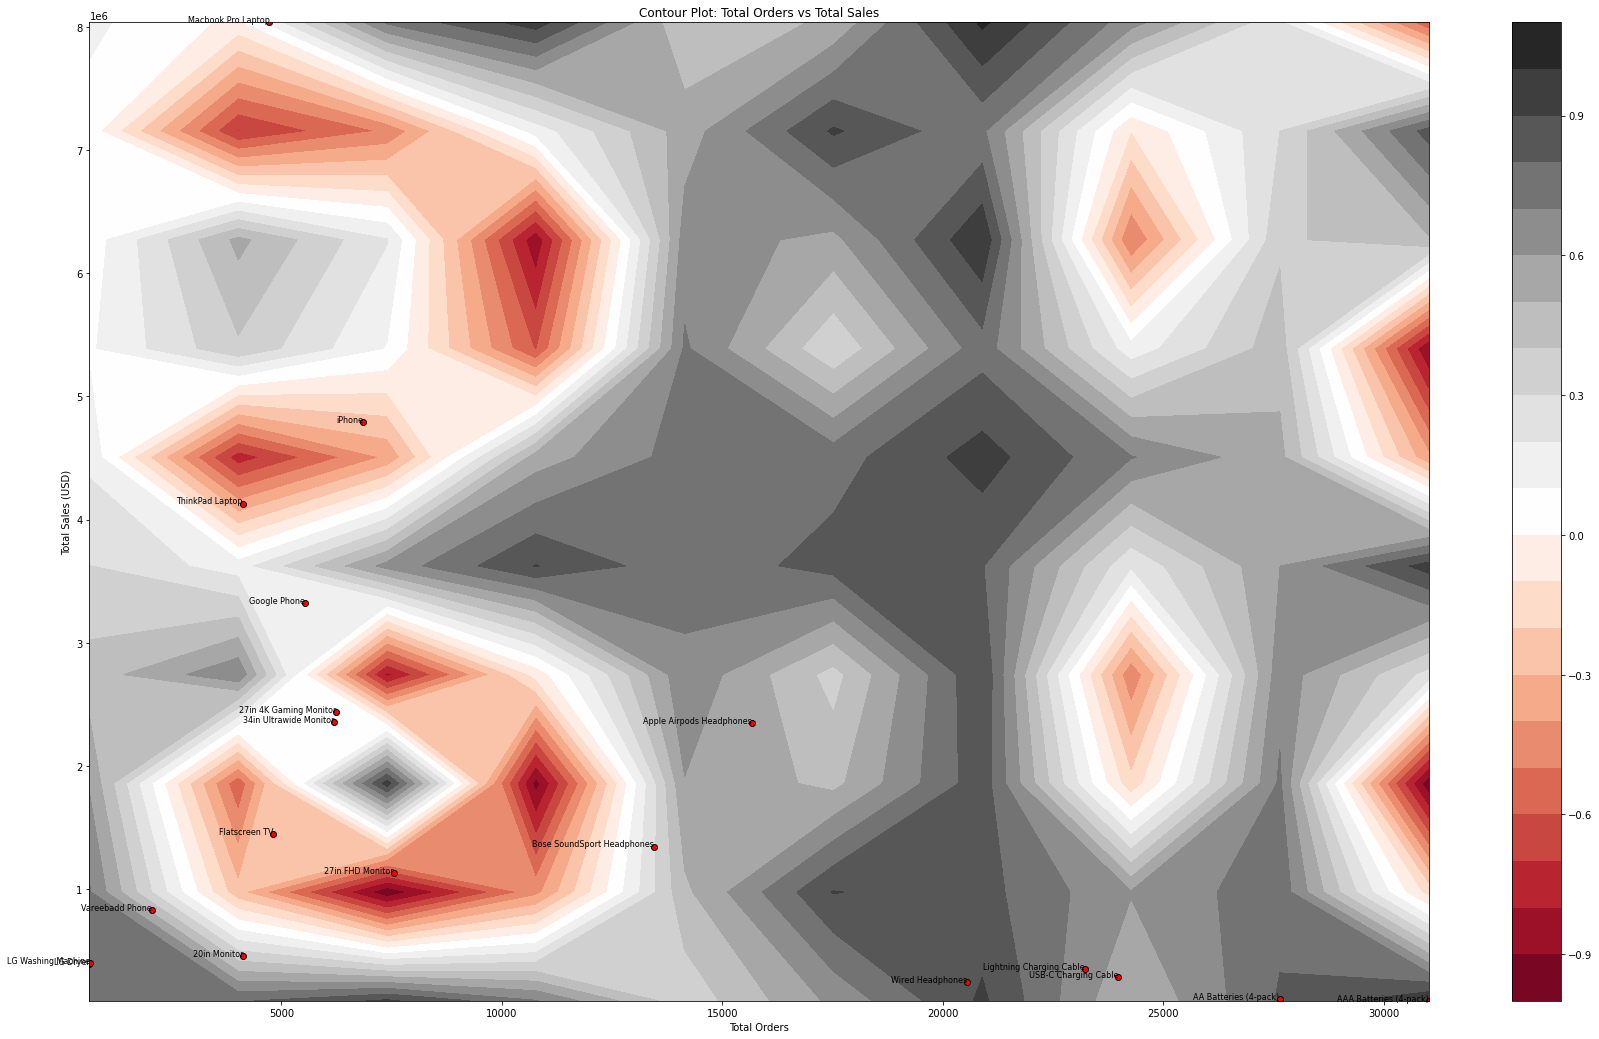

In [81]:

# Dữ liệu cho trục x và y
x = df1['Total_order']
y = df1['Total_sale']

# Tạo lưới cho Contour plot
X, Y = np.meshgrid(np.linspace(x.min(), x.max(), 10), np.linspace(y.min(), y.max(), 10))

# Tạo giá trị Z dựa trên khoảng cách đến các điểm dữ liệu thực tế
Z = np.sin(X) ** 10 + np.cos(10 + Y * X) * np.cos(X)

# Vẽ Contour plot
plt.figure(figsize=(30, 18))
contour = plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar()

# Thêm các điểm dữ liệu thực tế lên biểu đồ
plt.scatter(x, y, c='red', edgecolor='black')

# Gán nhãn và tiêu đề
plt.xlabel('Total Orders')
plt.ylabel('Total Sales (USD)')
plt.title('Contour Plot: Total Orders vs Total Sales')


# Ghi chú cho các điểm
for i, product in enumerate(product_ls):
    plt.annotate(product, (x[i], y[i]), fontsize=8, ha='right')

plt.show()